In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../../data/ml/clean.csv', parse_dates=['fecha'], low_memory=False)

In [3]:
nan_percentage = df.isna().mean() * 100
nan_percentage = nan_percentage[nan_percentage > 0].sort_values(ascending=False)
nan_percentage.apply(lambda x: f"{x:.2f}%")

sol         82.91%
pres_max    75.85%
pres_min    75.61%
dir_sin     20.79%
dir_cos     20.79%
racha       20.79%
velmedia    20.14%
hr_max       5.90%
hr_min       5.90%
hr_media     5.60%
prec         3.64%
tmed         2.27%
tmin         2.24%
tmax         2.23%
dtype: object

<Axes: >

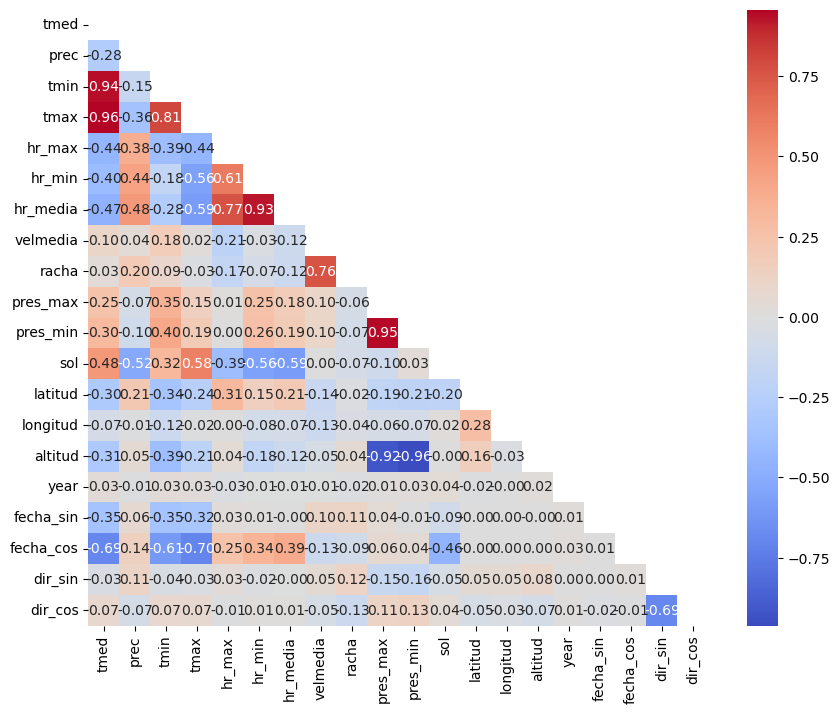

In [6]:
%matplotlib inline
spearman_corr_matrix = df.sample(500000).drop(columns=['idema', 'fecha']).corr(method='spearman')
mask = np.triu(np.ones_like(spearman_corr_matrix, dtype=bool))

plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', mask=mask, cbar=True)

### In cases of colinearity between variables, keep the one that correlates more with target (tmed)

In [12]:
df_new = df.drop(columns=['racha', 'dir_sin', 'dir_cos', 'year', 'velmedia',  'longitud', 'pres_min', 'pres_max', 'hr_min', 'sol'])

<Axes: >

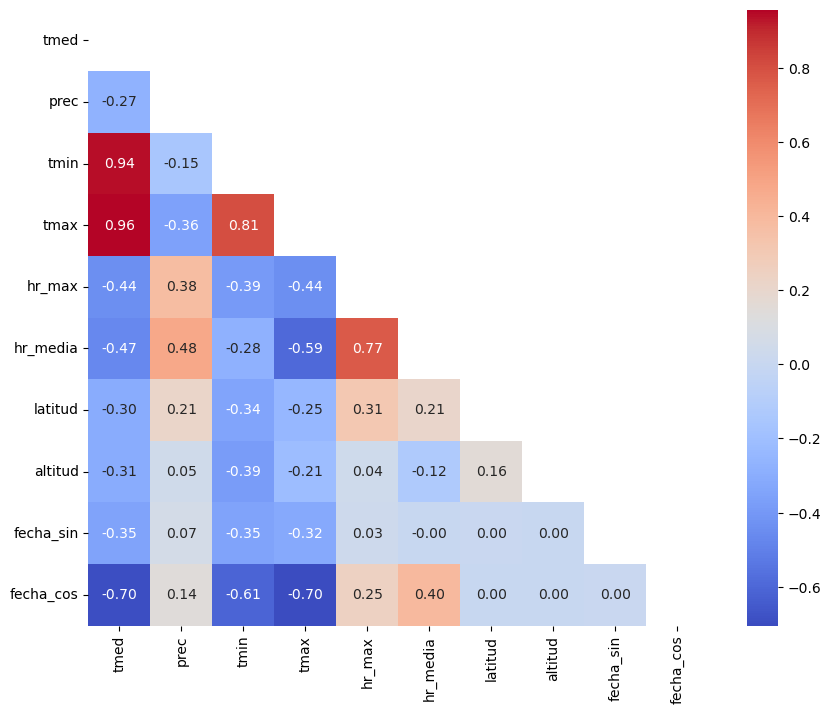

In [13]:
%matplotlib inline
new_spearman_corr_matrix = df_new.sample(500000).drop(columns=['idema', 'fecha']).corr(method='spearman')
mask = np.triu(np.ones_like(new_spearman_corr_matrix, dtype=bool))

plt.figure(figsize=(10, 8))
sns.heatmap(new_spearman_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', mask=mask, cbar=True)

In [14]:
nan_percentage = df_new.isna().mean() * 100
nan_percentage = nan_percentage[nan_percentage > 0].sort_values(ascending=False)
nan_percentage.apply(lambda x: f"{x:.2f}%")

hr_max      5.90%
hr_media    5.60%
prec        3.64%
tmed        2.27%
tmin        2.24%
tmax        2.23%
dtype: object

In [15]:
df_new.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4582780 entries, 0 to 4582779
Data columns (total 12 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   fecha      4582780 non-null  datetime64[ns]
 1   idema      4582780 non-null  object        
 2   tmed       4478791 non-null  float64       
 3   prec       4416140 non-null  float64       
 4   tmin       4479980 non-null  float64       
 5   tmax       4480696 non-null  float64       
 6   hr_max     4312300 non-null  float64       
 7   hr_media   4326144 non-null  float64       
 8   latitud    4582780 non-null  float64       
 9   altitud    4582780 non-null  int64         
 10  fecha_sin  4582780 non-null  float64       
 11  fecha_cos  4582780 non-null  float64       
dtypes: datetime64[ns](1), float64(9), int64(1), object(1)
memory usage: 419.6+ MB


In [16]:
df_new = df_new.round(4)

In [17]:
df_new.head()

,fecha,idema,tmed,prec,tmin,tmax,hr_max,hr_media,latitud,altitud,fecha_sin,fecha_cos
0,2010-01-01,2331,2.7,3.5,0.8,4.6,97.0,94.0,42.3500,891,0.5086,0.9999
1,2010-01-01,0320I,3.4,0.0,0.5,6.4,95.0,57.0,42.3167,1151,0.5086,0.9999
2,2010-01-01,C428T,16.2,0.0,13.7,18.8,77.0,69.0,28.1667,418,0.5086,0.9999
3,2010-01-01,C239N,17.1,0.0,12.0,22.2,86.0,69.0,28.2000,1,0.5086,0.9999
4,2010-01-01,B158X,13.0,0.0,11.2,14.8,70.0,59.0,39.5500,50,0.5086,0.9999


In [18]:
df_new.to_csv('../../data/ml/filtered.csv', index=False)